In [49]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

file_p = "C:/Users/user/Desktop/가천대/3학년 1학기/인공지능개론/AAME.csv"
df = pd.read_csv(file_p)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [50]:
open_vals = df[["Open"]].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(open_vals)

TEST_SIZE = 2000
train_data = scaled[:-TEST_SIZE]
test_data  = scaled[-TEST_SIZE:]

In [51]:
def make_sample(data, window):
    X_list, y_list = [], []
    for i in range(len(data) - window):
        X_list.append(data[i : i + window])
        y_list.append(data[i + window])
        
    return np.array(X_list), np.array(y_list)

In [52]:
window_size = 100
X_train_np, y_train_np = make_sample(train_data, window_size)
X_test_np,  y_test_np  = make_sample(test_data, window_size)

In [53]:
model = Sequential()

model.add(SimpleRNN(16, input_shape=(X_train_np.shape[1], 1), activation="tanh", return_sequences=False))
model.add(Dense(1))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train_np, y_train_np, epochs=10, batch_size=16)
pred = model.predict(X_test_np)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0126
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0033
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0031
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0036
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


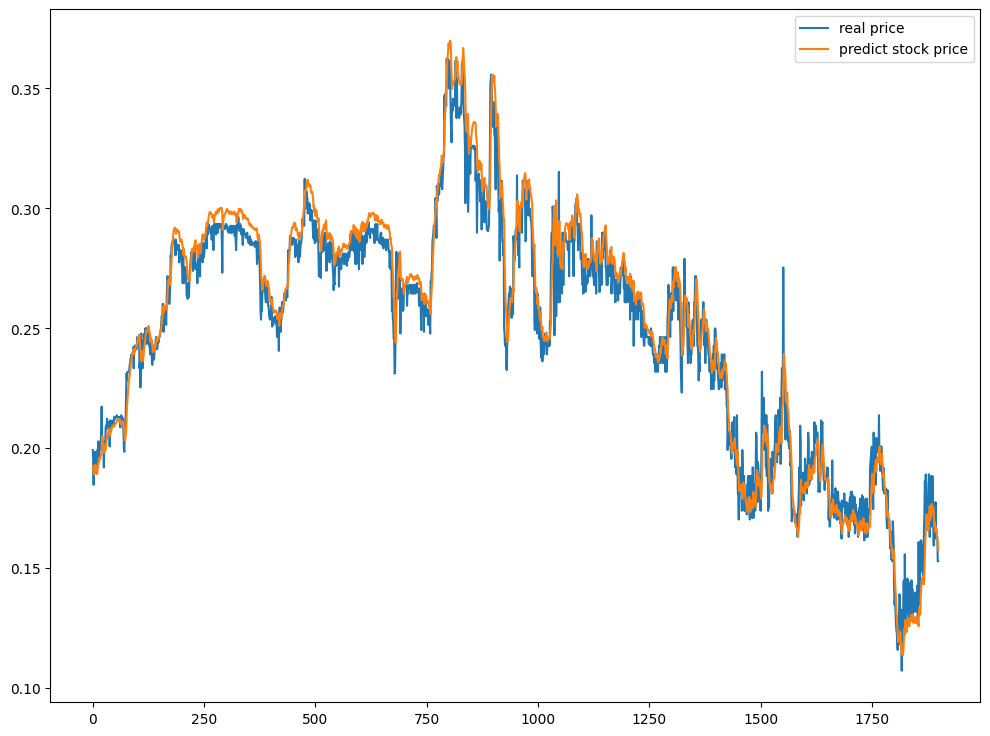

In [57]:
plt.figure(figsize=(12, 9))
plt.plot(y_test_np, label="real price")
plt.plot(pred, label="predict stock price")
plt.legend()
plt.show()

In [58]:
print("MSE:",  mean_squared_error(y_test_np, pred), "MAE:",  mean_absolute_error(y_test_np, pred), "R^2:",  r2_score(y_test_np, pred))

MSE: 0.0001025396805107875 MAE: 0.007705377355738129 R^2: 0.9573922104661952
